In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from astropy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import math
lc = Table.read('http://archive.stsci.edu/hlsps/kepler-smear/hlsp_kepler-smear_kepler_phot_kplr6777469_kepler_v1.0_lc.fits')
lc

FLUX,BJD,FLUX_CORR_4,BACKGROUND,FILT,FLUX_CORR_8,CADENCENO,QUARTER,MEDFLUX,FLUX0_CORR_4,FLUX0_CORR_8,FLUX1_CORR_4,FLUX1_CORR_8,FLUX2_CORR_4,FLUX2_CORR_8,FLUX3_CORR_4,FLUX3_CORR_8,FLUX4_CORR_4,FLUX4_CORR_8,SMEAR_TYPE
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.9908707539522802,54953.038345388915,1.000729365810023,45.68815231323242,1.0009778012670993,1.0010003983691442,568.0,0.0,65.50780260434365,0.9986806049188974,0.998507967497264,1.000729365810023,1.0010003983691442,0.9976142547680087,0.9977986409928266,0.9920726593694039,0.9925116921538678,0.9886344128193937,0.9891995984514625,2.0
0.9807816418277915,54953.05877990554,0.9905742358487928,45.68852615356445,1.00093260706301,0.9912974926993181,569.0,0.0,65.50780260434365,0.9879945192487969,0.9883016362860442,0.9905742358487928,0.9912974926993181,0.995491277969503,0.9959904382030896,0.9986947267740912,0.9992202110862669,1.0015741613819726,1.0021634470630196,2.0
0.9857828876584971,54953.07921432214,0.9960958940986623,45.68880844116211,1.0008885993952341,0.9964847156406494,570.0,0.0,65.50780260434365,0.9992308835814186,0.9991791437921386,0.9960958940986623,0.9964847156406494,0.9962479586290892,0.9965027708821333,0.9997471194930202,1.0001646470026844,1.0047149895606737,1.005245311204299,2.0
1.0095502670515306,54953.09964893871,1.0193245867158087,45.689002990722656,1.000843405191145,1.0200117297750224,571.0,0.0,65.50780260434365,1.0149921632679089,1.0153049886748307,1.0193245867158087,1.0200117297750224,1.027155617530684,1.027578954431023,1.0292065165168398,1.0296939053211587,1.031710654900075,1.0322327468309813,2.0
0.9786203960001305,54953.120083455266,0.9886751396204347,45.68910217285156,1.0007918405505383,0.9894998583868859,572.0,0.0,65.50780260434365,0.9892628064895047,0.9897658638563637,0.9886751396204347,0.9894998583868859,0.9854339830292337,0.9858784481826413,0.9831059487852565,0.9834558518255723,0.983396201905248,0.9836771542451686,2.0
0.9946958309365713,54953.140517871776,1.0042343983058728,45.689117431640625,1.0007402759099318,1.0053316813339652,573.0,0.0,65.50780260434365,1.0096762872461893,1.0105277720492323,1.0042343983058728,1.0053316813339652,0.9984854327542633,0.999129333656509,0.9967380923543109,0.9972957047990415,0.998099867520906,0.9985629119506438,2.0
0.9920345278628732,54953.160952388265,1.0014256252150389,45.68904495239258,1.0006645131076937,1.0021874703717826,574.0,0.0,65.50780260434365,1.0024340446881057,1.0029699374207426,1.0014256252150389,1.0021874703717826,1.0002691464152131,1.0005850264448282,0.9972838216052277,0.9975452137777312,0.9949197372650409,0.9950753669623673,2.0
0.9818509807896719,54953.18138700473,0.9917008660795175,45.68888854980469,1.0005709225803414,0.9923598295354128,575.0,0.0,65.50780260434365,0.9927415560032099,0.9931101546408578,0.9917008660795175,0.9923598295354128,0.9907284007318009,0.991023838397319,0.9872631645502057,0.987540570246899,0.987166918976459,0.9873906213016036,2.0
1.001913720602183,54953.20182142117,1.0115478621958292,45.68864822387695,1.0005129875032173,1.0123759880636125,576.0,0.0,65.50780260434365,1.012991297616982,1.0135691131177174,1.0115478621958292,1.0123759880636125,1.0131507821767687,1.013619059533089,1.0139633697949255,1.0144649073983614,1.0147743258654396,1.0152972616752305,2.0


In [2]:
x = lc['BJD']#.astype('int')
y = lc['FLUX_CORR_8']#.astype('int')

In [3]:
x[np.isnan(x)] = 0
y[np.isnan(y)] = 0

In [18]:
from astropy.timeseries import LombScargle
frequency = np.linspace(0.01,10,100000)
power = LombScargle(x,y).power(frequency)
#frequency, power = LombScargle(x,y).autopower(nyquist_factor=100)
#flog = np.log(frequency)
#plog = np.log(power)

Text(0.5, 1.0, 'Lomb-Scargle Periodogram')

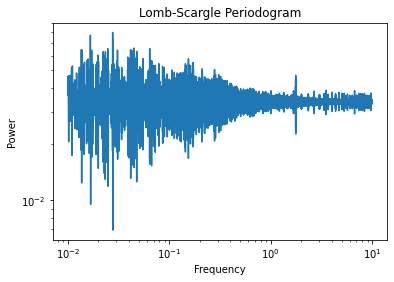

In [20]:
plt.loglog(frequency,power)
#plt.xlim([-0.005,0.02])
#plt.ylim([0,0.1])
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Lomb-Scargle Periodogram')